In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [42]:
data=pd.read_excel('data.xlsx',sheet_name='Sheet3')
data

,Models,Training Time,train-std,params(M),P,p-std,R,r-std,PA,PA-std,IoU,IoU-std,test time,test-std,FPS,FPS-std,F1,F1-std
0,DeepLabv3,16244.361132,10.130980,39.63,92.456667,1.577857,76.730000,2.219820,76.730000,2.219820,72.173333,1.040064,0.022640,0.000507,44.183603,0.981651,83.833083,0.700759
1,LRASPP,3036.783516,225.857796,3.22,91.623333,0.310859,75.353333,0.441626,75.353333,0.441626,70.500000,0.336006,0.016517,0.000843,60.648645,3.075242,82.694773,0.229707
2,FCN,12291.809367,65.759646,32.95,92.106667,0.598693,77.700000,0.410366,77.700000,0.410366,72.856667,0.653631,0.020368,0.000756,49.142256,1.861942,84.291746,0.434806
3,Enet,6494.329923,530.194323,0.36,93.070000,1.228698,77.120000,3.109357,77.120000,3.109357,72.896667,2.255002,0.017848,0.000638,56.076964,2.036858,84.311925,1.501397
4,DeepCrack,108967.691227,2851.221765,30.90,91.300000,0.280535,81.000000,1.486237,81.000000,1.486237,75.193333,1.099742,0.033932,0.001025,29.488430,0.877129,85.835636,0.718959
5,ECSNet,5011.214527,177.389763,0.41,92.163333,0.720023,77.930000,0.643661,77.930000,0.643661,73.080000,0.124900,0.013662,0.000608,73.294362,3.325369,84.447546,0.085342
6,Unet,14560.574967,35.527346,13.39,91.866667,0.498130,78.610000,1.806682,78.610000,1.806682,73.033333,1.309364,0.015608,0.000368,64.093025,1.510056,84.411985,0.867288


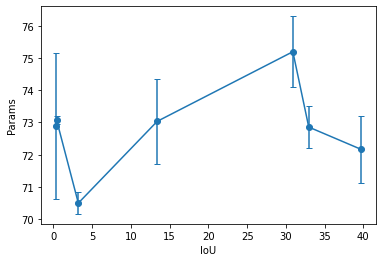

In [43]:
data1=data.sort_values(by=['params(M)'])
ind=np.arange(len(data1['Models']))
plt.errorbar(data1['params(M)'],data1['IoU'],yerr = data1['IoU-std'],marker='o',capsize=3,label='Params')
plt.ylabel('Params')
plt.xlabel('IoU')
plt.savefig('Iou-params.png',dpi=600,bbox_inches = 'tight')

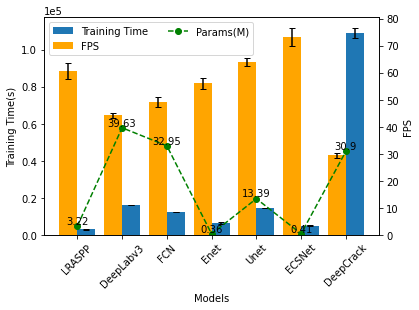

In [46]:
# data1=data.sort_values(by=['FPS'])
data1=data.sort_values(by=['IoU'])
ind=np.arange(len(data1['Models']))
width=0.4
fig = plt.figure()
ax = fig.add_subplot(111)

ax2 = ax.twinx()
lns1 = ax.bar(ind+0.5*width,data1['Training Time'],width,yerr=data1['train-std'],capsize=3,label='Training Time')

# plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center', label='IoU')

lns2 = ax2.bar(ind-0.5*width,data1['FPS'],width,yerr=data1['FPS-std'],capsize=3,color='orange',label='FPS')
lns3 = ax2.plot(ind,data1['params(M)'],'--o',color='green',label='Params(M)')
for a, b in zip(ind, data1['params(M)']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)


ax.set_xlabel('Models')
# ax2.set_ylim(0,150)
ax.set_ylabel('Training Time(s)')
ax.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
ax2.set_ylabel('FPS')
# ax2.text(-60, 45, r'$\tau _{f} $',color='black')

lns = [lns1,lns2]+lns3

# lns = [p1,p2,p3,p4,p5,p6]
ax.legend(handles=lns,ncol=2,loc=0)

# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs)
# plt.xlim(-50,200)
ax.set(xticks=ind + width, xticklabels=data1['Models'])
# ax.set_xticks(ind, data1['Models'],rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels( data1['Models'], rotation=45)
# ax.set_yscale('log')

# plt.tight_layout()
# plt.savefig('lambda state.png',dpi=600,bbox_inches = 'tight')

plt.savefig('training time vs FPS.png',dpi=600,bbox_inches = 'tight')

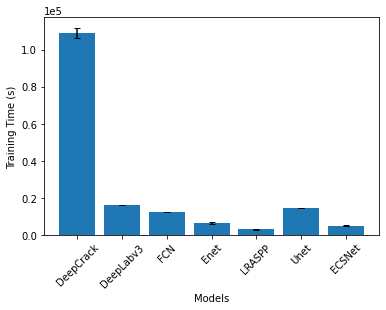

In [5]:
data1=data.sort_values(by=['FPS'])
# data1=data
ind=np.arange(len(data1['Models']))
plt.bar(data1['Models'],data1['Training Time'],yerr=data1['train-std'],capsize=3)
plt.xticks(ind, data1['Models'],rotation=45)
# plt.yscale('log')
plt.ylabel('Training Time (s)')
plt.xlabel('Models')
plt.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
plt.savefig('training-time.png',dpi=600,bbox_inches = 'tight')

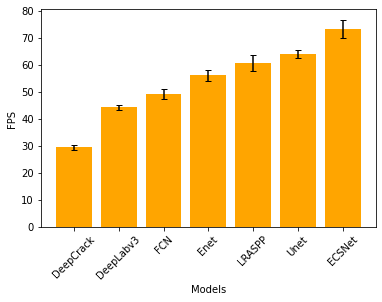

In [6]:
data1=data.sort_values(by=['FPS'])
# data1=data
ind=np.arange(len(data1['Models']))
plt.bar(data1['Models'],data1['FPS'],yerr=data1['FPS-std'],color='orange',capsize=3)
plt.xticks(ind, data1['Models'],rotation=45)
# plt.yscale('log')
plt.ylabel('FPS')
plt.xlabel('Models')
plt.savefig('Iou-comparison.png',dpi=600,bbox_inches = 'tight')

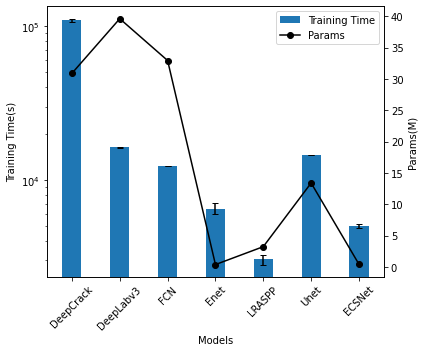

In [7]:
data1=data.sort_values(by=['FPS'])
ind=np.arange(len(data1['Models']))
width=0.4
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax2 = ax.twinx()
lns1 = ax.bar(ind,data1['Training Time'],width,yerr=data1['train-std'],capsize=3,label='Training Time')

# plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center', label='IoU')

lns2 = ax2.plot(ind,data1['params(M)'],marker='o',color='black',label='Params')

# lns2 = ax2.bar(ind-0.5*width,data1['FPS'],width,yerr=data1['FPS-std'],capsize=3,color='orange',label='FPS')


ax.set_xlabel('Models')
# ax2.set_ylim(0,150)
ax.set_ylabel('Training Time(s)')
ax.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
ax2.set_ylabel('Params(M)')
# ax2.text(-60, 45, r'$\tau _{f} $',color='black')

lns = [lns1]+lns2

# lns = [p1,p2,p3,p4,p5,p6]
# ax.legend(handles=lns)

labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
# plt.xlim(-50,200)
ax.set(xticks=ind + width, xticklabels=data1['Models'])
# ax.set_xticks(ind, data1['Models'],rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels( data1['Models'], rotation=45)
ax.set_yscale('log')

plt.tight_layout()
# plt.savefig('lambda state.png',dpi=600,bbox_inches = 'tight')

plt.savefig('training time vs params.png',dpi=600,bbox_inches = 'tight')

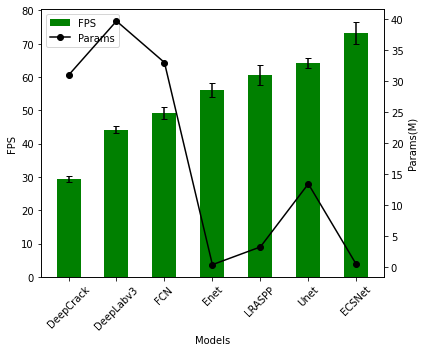

In [8]:
data1=data.sort_values(by=['FPS'])
ind=np.arange(len(data1['Models']))
width=0.5
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax2 = ax.twinx()
lns1 = ax.bar(ind,data1['FPS'],width,yerr=data1['FPS-std'],capsize=3,color='green',label='FPS')

# plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center', label='IoU')

lns2 = ax2.plot(ind,data1['params(M)'],marker='o',color='black',label='Params')

# lns2 = ax2.bar(ind-0.5*width,data1['FPS'],width,yerr=data1['FPS-std'],capsize=3,color='orange',label='FPS')


ax.set_xlabel('Models')
# ax2.set_ylim(0,150)
ax.set_ylabel('FPS')
# ax.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
ax2.set_ylabel('Params(M)')
# ax2.text(-60, 45, r'$\tau _{f} $',color='black')

lns = [lns1]+lns2

# lns = [p1,p2,p3,p4,p5,p6]
# ax.legend(handles=lns)

labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
# plt.xlim(-50,200)
ax.set(xticks=ind + width, xticklabels=data1['Models'])
# ax.set_xticks(ind, data1['Models'],rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels( data1['Models'], rotation=45)
# ax.set_yscale('log')

plt.tight_layout()
# plt.savefig('lambda state.png',dpi=600,bbox_inches = 'tight')

plt.savefig('FPS vs params.png',dpi=600,bbox_inches = 'tight')

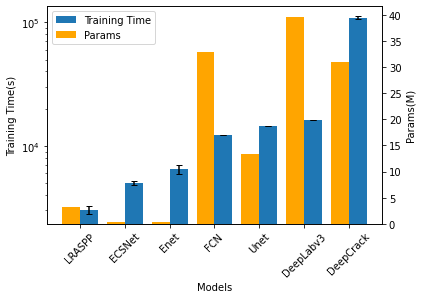

In [9]:
data1=data.sort_values(by=['Training Time'])
ind=np.arange(len(data1['Models']))
width=0.4
fig = plt.figure()
ax = fig.add_subplot(111)

ax2 = ax.twinx()
lns1 = ax.bar(ind+0.5*width,data1['Training Time'],width,yerr=data1['train-std'],capsize=3,label='Training Time')

# plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center', label='IoU')

lns2 = ax2.bar(ind-0.5*width,data1['params(M)'],width,capsize=3,color='orange',label='Params')


ax.set_xlabel('Models')
# ax2.set_ylim(0,150)
ax.set_ylabel('Training Time(s)')
ax.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
ax2.set_ylabel('Params(M)')
# ax2.text(-60, 45, r'$\tau _{f} $',color='black')

lns = [lns1,lns2]

# lns = [p1,p2,p3,p4,p5,p6]
ax.legend(handles=lns)

# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs)
# plt.xlim(-50,200)
ax.set(xticks=ind + width, xticklabels=data1['Models'])
# ax.set_xticks(ind, data1['Models'],rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels( data1['Models'], rotation=45)
ax.set_yscale('log')

# plt.tight_layout()
# plt.savefig('lambda state.png',dpi=600,bbox_inches = 'tight')

plt.savefig('training time vs Params.png',dpi=600,bbox_inches = 'tight')

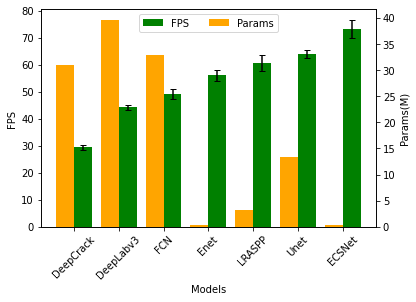

In [10]:
data1=data.sort_values(by=['FPS'])
ind=np.arange(len(data1['Models']))
width=0.4
fig = plt.figure()
ax = fig.add_subplot(111)

ax2 = ax.twinx()
lns1 = ax.bar(ind+0.5*width,data1['FPS'],width,yerr=data1['FPS-std'],capsize=3,color='green',label='FPS')

# plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center', label='IoU')

lns2 = ax2.bar(ind-0.5*width,data1['params(M)'],width,capsize=3,color='orange',label='Params')


ax.set_xlabel('Models')
# ax2.set_ylim(0,150)
ax.set_ylabel('FPS')
ax.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
ax2.set_ylabel('Params(M)')
# ax2.text(-60, 45, r'$\tau _{f} $',color='black')

lns = [lns1,lns2]

# lns = [p1,p2,p3,p4,p5,p6]
ax.legend(handles=lns,ncol=2,loc=9)

# labs = [l.get_label() for l in lns]
# ax2.legend(lns, labs)
# plt.xlim(-50,200)
ax.set(xticks=ind + width, xticklabels=data1['Models'])
# ax.set_xticks(ind, data1['Models'],rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels( data1['Models'], rotation=45)
# ax.set_yscale('log')

# plt.tight_layout()
# plt.savefig('lambda state.png',dpi=600,bbox_inches = 'tight')

plt.savefig('FPS vs Params.png',dpi=600,bbox_inches = 'tight')

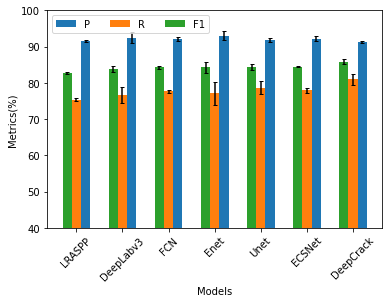

In [11]:
time=data.sort_values(by=['F1'])
# fig, ax = plt.subplots(figsize=(6,6))
ind=np.arange(len(time['Models']))

width=0.2
#plt.bar(ind,time['mean_macro_re'],width,yerr=time['std_macro_re'],ecolor='k', align='center', label='Recall')
plt.bar(ind+width,time['P'], width,yerr=time['p-std'],ecolor='k', align='center',capsize=2, label='P')
plt.bar(ind,time['R'], width,yerr=time['r-std'],ecolor='k', align='center',capsize=2, label='R')
plt.bar(ind-width,time['F1'],width,yerr=time['F1-std'],ecolor='k', align='center',capsize=2,label='F1')
#ax.barh(ind-2*width,time['mean_acc'], width,xerr=time['std_acc'], label='Accuracy')

ax.set(xticks=ind + width, xticklabels=time['Models'])
plt.xticks(ind, time['Models'],rotation=45)
plt.xlabel("Models")
plt.ylabel("Metrics(%)")
# #plt.title("Time")
plt.legend(ncol=3,loc=2)
# plt.show()
#plt.tight_layout()
plt.ylim(40,100)
plt.savefig('acc-comparison.png',dpi=600,bbox_inches = 'tight')

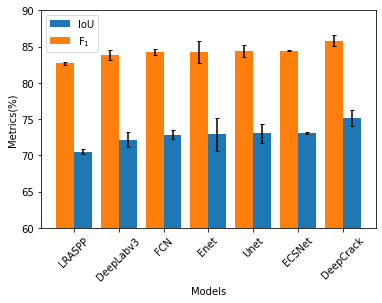

In [12]:
time=data.sort_values(by=['IoU'])
# fig, ax = plt.subplots(figsize=(6,6))
ind=np.arange(len(time['Models']))

width=0.4
#plt.bar(ind,time['mean_macro_re'],width,yerr=time['std_macro_re'],ecolor='k', align='center', label='Recall')
plt.bar(ind+0.5*width,time['IoU'], width,yerr=time['IoU-std'],ecolor='k', align='center',capsize=2, label='IoU')

plt.bar(ind-0.5*width,time['F1'],width,yerr=time['F1-std'],ecolor='k', align='center',capsize=2,label='$\mathregular{F_1}$')
#ax.barh(ind-2*width,time['mean_acc'], width,xerr=time['std_acc'], label='Accuracy')

ax.set(xticks=ind + width, xticklabels=time['Models'])
plt.xticks(ind, time['Models'],rotation=45)
plt.xlabel("Models")
plt.ylabel("Metrics(%)")
# #plt.title("Time")
plt.legend()
# plt.show()
#plt.tight_layout()
plt.ylim(60,90)
plt.savefig('acc-comparison.png',dpi=600,bbox_inches = 'tight')


In [22]:
data=pd.read_excel('data.xlsx',sheet_name='Sheet5')
data

,Models,FPS,IoU,P,training time,param,IoU-avg,IoU-std
0,DeepLabv3,43.103448,71.02,91.33,16234.274000,39.63,72.173333,1.040064
1,DeepLabv3,44.426042,72.46,91.78,16244.274000,39.63,NaN,NaN
2,DeepLabv3,45.021318,73.04,94.26,16254.535397,39.63,NaN,NaN
3,LRASPP,57.471264,70.82,91.41,2813.339998,3.22,70.500000,0.336006
4,NaN,60.864273,70.15,91.48,3032.030000,3.22,NaN,NaN
5,NaN,63.610399,70.53,91.98,3264.980550,3.22,NaN,NaN
6,FCN,47.842312,72.52,91.55,12237.431792,32.95,72.856667,0.653631
7,NaN,48.309179,72.44,92.03,12273.100000,32.95,NaN,NaN
8,NaN,51.275278,73.61,92.74,12364.896309,32.95,NaN,NaN
9,Enet,54.463265,75.32,91.90,6053.864770,0.36,72.896667,2.255002


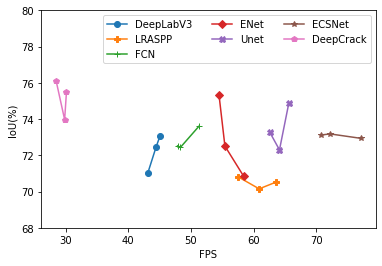

In [36]:
# plt.plot(data['FPS'],data['IoU'],zorder=2)
plt.plot(data['FPS'][0:3],data['IoU'][0:3], '-o',label = 'DeepLabV3')
plt.plot(data['FPS'][3:6],data['IoU'][3:6], '-P',label = 'LRASPP')
plt.plot(data['FPS'][6:9],data['IoU'][6:9], '-+',label = 'FCN')
plt.plot(data['FPS'][9:12],data['IoU'][9:12], '-D',label = 'ENet')
plt.plot(data['FPS'][12:15],data['IoU'][12:15], '-X',label = 'Unet')
plt.plot(data['FPS'][15:18],data['IoU'][15:18], '-*',label = 'ECSNet')
plt.plot(data['FPS'][18:21],data['IoU'][18:21], '-p',label = 'DeepCrack')
# plt.plot(data['FPS'][21:24],data['IoU'][21:24], '->',label = 'ESCNet-m')


plt.legend(ncol=3)

# plt.xlim(0,90)
plt.ylim(68,80)
plt.xlabel('FPS')
plt.ylabel('IoU(%)')
plt.savefig('IoUvsFPS.png',dpi=600,bbox_inches = 'tight')


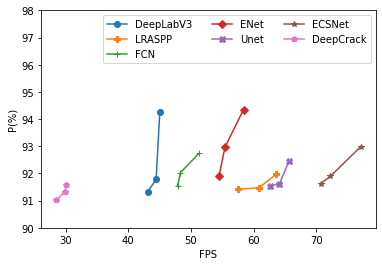

In [37]:
# plt.plot(data['FPS'],data['IoU'],zorder=2)
plt.plot(data['FPS'][0:3],data['P'][0:3], '-o',label = 'DeepLabV3')
plt.plot(data['FPS'][3:6],data['P'][3:6], '-P',label = 'LRASPP')
plt.plot(data['FPS'][6:9],data['P'][6:9], '-+',label = 'FCN')
plt.plot(data['FPS'][9:12],data['P'][9:12], '-D',label = 'ENet')
plt.plot(data['FPS'][12:15],data['P'][12:15], '-X',label = 'Unet')
plt.plot(data['FPS'][15:18],data['P'][15:18], '-*',label = 'ECSNet')
plt.plot(data['FPS'][18:21],data['P'][18:21], '-p',label = 'DeepCrack')
# plt.plot(data['FPS'][21:24],data['P'][21:24], '->',label = 'ESCNet-m')


plt.legend(ncol=3)

# plt.xlim(0,90)
plt.ylim(90,98)
plt.xlabel('FPS')
plt.ylabel('P(%)')
plt.savefig('pvsFPS.png',dpi=600,bbox_inches = 'tight')


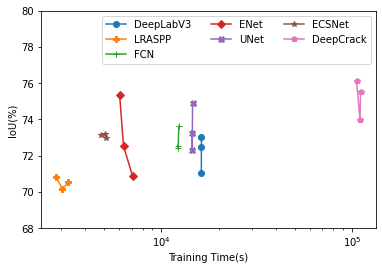

In [38]:
# plt.plot(data['FPS'],data['IoU'],zorder=2)
plt.plot(data['training time'][0:3],data['IoU'][0:3], '-o',label = 'DeepLabV3')
plt.plot(data['training time'][3:6],data['IoU'][3:6], '-P',label = 'LRASPP')
plt.plot(data['training time'][6:9],data['IoU'][6:9], '-+',label = 'FCN')
plt.plot(data['training time'][9:12],data['IoU'][9:12], '-D',label = 'ENet')
plt.plot(data['training time'][12:15],data['IoU'][12:15], '-X',label = 'UNet')
# plt.plot(data['FPS'][12:15],data['IoU'][12:15], '-o',label = 'Unet')
plt.plot(data['training time'][15:18],data['IoU'][15:18], '-*',label = 'ECSNet')
plt.plot(data['training time'][18:21],data['IoU'][18:21], '-p',label = 'DeepCrack')
# plt.plot(data['training time'][21:24],data['IoU'][21:24], '->',label = 'ESCNet-m')


plt.legend(ncol=3)

# plt.xlim(1,1e5)
plt.ylim(68,80)
plt.xscale('log')
plt.xlabel('Training Time(s)')
plt.ylabel('IoU(%)')
plt.savefig('IoUvstrainingtime.png',dpi=600,bbox_inches = 'tight')


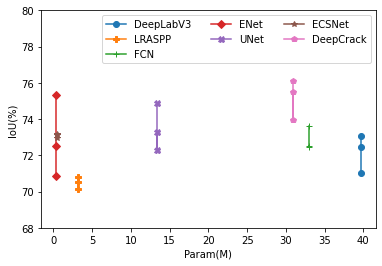

In [39]:
# plt.plot(data['FPS'],data['IoU'],zorder=2)
plt.plot(data['param'][0:3],data['IoU'][0:3], '-o',label = 'DeepLabV3')
plt.plot(data['param'][3:6],data['IoU'][3:6], '-P',label = 'LRASPP')
plt.plot(data['param'][6:9],data['IoU'][6:9], '-+',label = 'FCN')
plt.plot(data['param'][9:12],data['IoU'][9:12], '-D',label = 'ENet')
plt.plot(data['param'][12:15],data['IoU'][12:15], '-X',label = 'UNet')
# plt.plot(data['FPS'][12:15],data['IoU'][12:15], '-o',label = 'Unet')
plt.plot(data['param'][15:18],data['IoU'][15:18], '-*',label = 'ECSNet')
plt.plot(data['param'][18:21],data['IoU'][18:21], '-p',label = 'DeepCrack')
# plt.plot(data['training time'][21:24],data['IoU'][21:24], '->',label = 'ESCNet-m')


plt.legend(ncol=3)

# plt.xlim(1,1e5)
plt.ylim(68,80)
# plt.xscale('log')
plt.xlabel('Param(M)')
plt.ylabel('IoU(%)')
plt.savefig('IoUvsparam222.png',dpi=600,bbox_inches = 'tight')

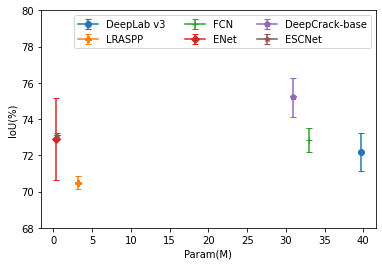

In [40]:
# plt.plot(data['FPS'],data['IoU'],zorder=2)
plt.errorbar(data['param'][0],data['IoU-avg'][0],yerr=data['IoU-std'][0],marker='o',capsize=3,label = 'DeepLab v3')
plt.errorbar(data['param'][3],data['IoU-avg'][3],yerr=data['IoU-std'][3], marker='P',capsize=3,label = 'LRASPP')
plt.errorbar(data['param'][6],data['IoU-avg'][6],yerr=data['IoU-std'][6], marker='+',capsize=3,label = 'FCN')
plt.errorbar(data['param'][9],data['IoU-avg'][9],yerr=data['IoU-std'][9], marker='D',capsize=3,label = 'ENet')


plt.errorbar(data['param'][18],data['IoU-avg'][18],yerr=data['IoU-std'][18], marker='p',capsize=3,label = 'DeepCrack-base')
plt.errorbar(data['param'][15],data['IoU-avg'][15],yerr=data['IoU-std'][15], marker='*',capsize=3,label = 'ESCNet')



plt.legend(ncol=3)

# plt.xlim(0,90)
plt.ylim(68,80)
plt.xlabel('Param(M)')
plt.ylabel('IoU(%)')
plt.savefig('IoUvsparam.png',dpi=600,bbox_inches = 'tight')


In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
def relu(x):
    
    if x > 0:
        relu = x
    else:
        relu = 0
    
    return relu
def prelu(x,p):
    if x>0 :
        return x
    else :
        return p*x
    

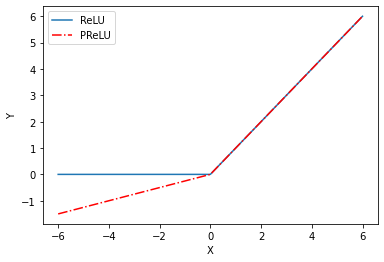

In [20]:
x = np.linspace(-6, 6, 1000)
y = np.maximum(0, x)

# plt.figure(figsize=(6, 5))
plt.plot(x, y,label='ReLU')

x = np.linspace(-6,6, 1000)
# x2 = np.linspace(-10,, 1000)
p=0.25

y1 = np.maximum(0, x)

y2 = np.minimum(0,p*x)


y=y1+y2

# plt.figure(figsize=(6, 5))
plt.plot(x, y,'-.',color='red',label='PReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Reluvsprelu.png',dpi=600,bbox_inches = 'tight')


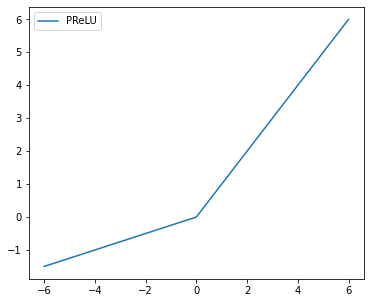

In [21]:
x = np.linspace(-6,6, 1000)
# x2 = np.linspace(-10,, 1000)
p=0.25

y1 = np.maximum(0, x)

y2 = np.minimum(0,p*x)


y=y1+y2

plt.figure(figsize=(6, 5))
plt.plot(x, y)
plt.legend(['PReLU'])
